## 自编码器(Auto-Encoder)实例
使用TensorFlow创建一个2层的自解码网络，将图像压缩到一个潜在的低维空间，然后再恢复它  
  
- 作者: Aymeric Damien
- 代码: https://github.com/aymericdamien/TensorFlow-Examples/

#### 自编码器简介
<img src="http://kvfrans.com/content/images/2016/08/autoenc.jpg" alt="ae" style="width: 800px;"/>
参考：  
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.

#### MNIST数据集简介
  
该例使用了MNIST手写数字数据集。MNIST数据集包含60000个实例，其中50000作为训练集，10000作为测试集。数字的大小已经被标准化和中心化到了固定的(0,1)区间(28\*28像素)。为了简便起见，每个图像矩阵被平铺，并转换为一个1维的numpy矩阵，其中包含784个特征点(28\*28)  
  
![MNIST 数据集](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)  
  
更多细节：http://yann.lecun.com/exdb/mnist/

In [1]:
from __future__ import division,print_function,absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #将matplotlib绘图嵌入到jupyter notebook中

#### 1. 导入MNIST数据集

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/',one_hot = True) #当前目录下创建一个data文件夹即可

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


#### 2. 自定义参数

In [8]:
#训练参数
learning_rate = 0.01
num_step = 30000
batch_size = 256

display_step = 1000
example_to_show = 10

#网络模型参数
num_hidden_1 = 256        #第一层的特征数
num_hidden_2 = 128        #第二层的特征数
num_input = 784           #MNIST的输入值（28*28像素）

#tensorflow Graph输入
X = tf.placeholder('float',[None,num_input])

weights = {
    'encoder_h1':tf.Variable(tf.random_normal([num_input,num_hidden_1])),
    'encoder_h2':tf.Variable(tf.random_normal([num_hidden_1,num_hidden_2])),
    'decoder_h1':tf.Variable(tf.random_normal([num_hidden_2,num_hidden_1])),
    'decoder_h2':tf.Variable(tf.random_normal([num_hidden_1,num_input])),
}

biases = {
    'encoder_b1':tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1':tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2':tf.Variable(tf.random_normal([num_input])),
}

#### 3. 构建模型

In [13]:
#构建编码器
def encoder(x):
    #编码器第1层使用sigmoid激活函数
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),
                                  biases['encoder_b1']))
    #编码器第2层使用sigmoid激活函数
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['encoder_h2']),
                                  biases['encoder_b2']))
    return layer_2


#构建解码器
def decoder(x):
    #解码器第1层使用sigmoid激活函数
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),
                                  biases['decoder_b1']))
    #解码器第2层使用sigmoid激活函数
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['decoder_h2']),
                                  biases['decoder_b2']))
    return layer_2


#构建模型
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

#预测
y_pred = decoder_op
#目标（标签）是输入数据
y_true = X

#定义loss函数和优化器，最小化平方误差
loss = tf.reduce_mean(tf.pow(y_true - y_pred,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

#初始化变量(例：赋默认值)
init = tf.global_variables_initializer()

#### 4. 开始训练

In [14]:
#定义session
sess = tf.Session()

#初始化
sess.run(init)

#训练
for i in range(1,num_step+1):
    #准备数据
    #取MNIST的下一个batch（只需要图像数据，不需要标签）
    batch_x , _ =mnist.train.next_batch(batch_size)
    
    #运行optimizer操作（反向传播）和cost操作
    _, l = sess.run([optimizer,loss],feed_dict = {X:batch_x})
    
    #显示每一个step的loss
    if i % display_step == 0 or i == 1:
        print ('Step %i: Minibatch Loss: %f'%(i,l))


Step 1: Minibatch Loss: 0.448150
Step 1000: Minibatch Loss: 0.146389
Step 2000: Minibatch Loss: 0.130988
Step 3000: Minibatch Loss: 0.120402
Step 4000: Minibatch Loss: 0.112094
Step 5000: Minibatch Loss: 0.106828
Step 6000: Minibatch Loss: 0.102066
Step 7000: Minibatch Loss: 0.100275
Step 8000: Minibatch Loss: 0.094173
Step 9000: Minibatch Loss: 0.091749
Step 10000: Minibatch Loss: 0.089910
Step 11000: Minibatch Loss: 0.087164
Step 12000: Minibatch Loss: 0.083922
Step 13000: Minibatch Loss: 0.082088
Step 14000: Minibatch Loss: 0.079559
Step 15000: Minibatch Loss: 0.078890
Step 16000: Minibatch Loss: 0.076782
Step 17000: Minibatch Loss: 0.071964
Step 18000: Minibatch Loss: 0.070992
Step 19000: Minibatch Loss: 0.068339
Step 20000: Minibatch Loss: 0.067033
Step 21000: Minibatch Loss: 0.066555
Step 22000: Minibatch Loss: 0.064232
Step 23000: Minibatch Loss: 0.061629
Step 24000: Minibatch Loss: 0.058763
Step 25000: Minibatch Loss: 0.060081
Step 26000: Minibatch Loss: 0.057991
Step 27000: Mi

#### 5. 模型预测
编码器和解码器中的图像都来自于测试集，并且将模型重构的图像做可视化


原图


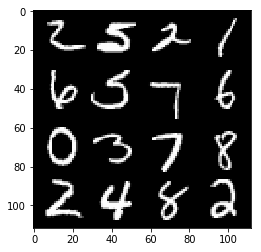

重构图


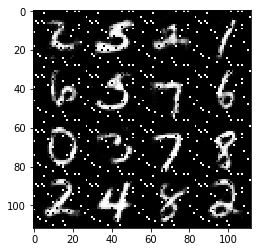

In [22]:
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    #MNIST测试集
    batch_x,_ = mnist.test.next_batch(n)
    #对图像做编解码
    g = sess.run(decoder_op,feed_dict = {X:batch_x})
    
    
    #显示原图
    for j in range(n):
        # 画出生成数字
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    #显示重构图像
    for j in range(n):
        # 画出生成数字
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

        
print("原图")     
#plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("重构图")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()
        
        
        